# Forecasting_the_energy_performance_of_buildings_Python_version

### Ouverture des données 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('./DataEnergy-Students.csv')
data.rename(columns={"Load": "Energy"}, inplace = True)
data

,Relative.compactness,Surface.area,Wall.area,Roof.area,Overall.height,orientation,Glazing.area,Glazing.area.distr,Energy,Energy.efficiency
1,0.982928,530.489958,306.484593,112.002683,7.0,North,0.016095,0,34.263943,C
2,0.983547,519.872380,299.776324,110.048028,7.0,East,-0.009387,0,34.589751,C
3,0.979453,516.191221,303.374358,106.408431,7.0,South,-0.000697,0,38.778048,C
4,0.977733,518.924089,292.812213,113.055938,7.0,West,0.000010,0,37.947808,C
5,0.903029,552.968920,316.236102,118.366409,7.0,North,-0.006592,0,47.675859,D
...,...,...,...,...,...,...,...,...,...,...
764,0.643870,790.290262,348.780889,220.754687,3.5,West,0.390400,5,38.499586,C
765,0.619200,809.375965,368.120488,220.627738,3.5,North,0.386594,5,41.731977,B
766,0.624317,813.327318,372.006715,220.660302,3.5,East,0.392286,5,26.876596,B
767,0.624847,808.717739,367.865290,220.426225,3.5,South,0.397574,5,32.689589,B


+ GLAZING AREA A REMETTRE POSITIF!!!!
+ REDONDANCE DANS LES VARIABLES 

In [60]:
data.dtypes

Relative.compactness    float64
Surface.area            float64
Wall.area               float64
Roof.area               float64
Overall.height          float64
orientation              object
Glazing.area            float64
Glazing.area.distr        int64
Energy                  float64
Energy.efficiency        object
dtype: object

###  Etude la variable réponse / Unidimensionnel 

In [9]:
np.unique(data['Energy.efficiency'])

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

On retrouve bien toutes nos catégories

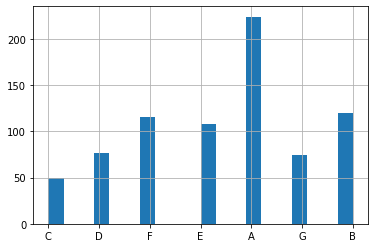

In [32]:
data["Energy.efficiency"].hist(bins=20)
plt.show()

### Multidimensionelle

In [26]:
data.describe()

,Relative.compactness,Surface.area,Wall.area,Roof.area,Overall.height,Glazing.area,Glazing.area.distr,Energy
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.00000,768.000000
mean,0.764511,671.349569,318.331811,176.508879,5.25000,0.234347,2.81250,46.923575
std,0.105914,88.216217,43.942031,45.206368,1.75114,0.133144,1.55096,19.863003
min,0.612496,501.450033,234.338121,105.338876,3.50000,-0.024009,0.00000,10.211493
25%,0.677856,598.684672,291.800051,137.385287,3.50000,0.103055,1.75000,29.360416
50%,0.751687,673.069405,315.761457,183.308441,5.25000,0.247521,3.00000,41.761247
75%,0.835044,744.594128,342.981089,220.510532,7.00000,0.391185,4.00000,64.327196
max,0.991210,825.950839,425.805165,225.757721,7.00000,0.427021,5.00000,94.842601


In [63]:
pd.crosstab(data["Energy.efficiency"],data["orientation"])

orientation,East,North,South,West
Energy.efficiency,,,,
A,56,56,56,56
B,30,30,30,30
C,13,12,13,12
D,19,19,20,19
E,28,27,26,27
F,28,29,30,28
G,18,19,17,20


L'orientation ne joue pas sur l'Energie, on remarque que la répartition des classes est équilibrée. L'orientation ne va pas jouer sur l'énergie. (??)

In [61]:
pd.crosstab(data["Energy.efficiency"],data["Glazing.area.distr"])

Glazing.area.distr,0,1,2,3,4,5
Energy.efficiency,,,,,,
A,24,36,39,43,38,44
B,0,28,25,21,26,20
C,10,8,8,8,8,8
D,10,11,14,14,14,14
E,2,23,20,21,21,21
F,2,22,23,23,22,23
G,0,16,15,14,15,14


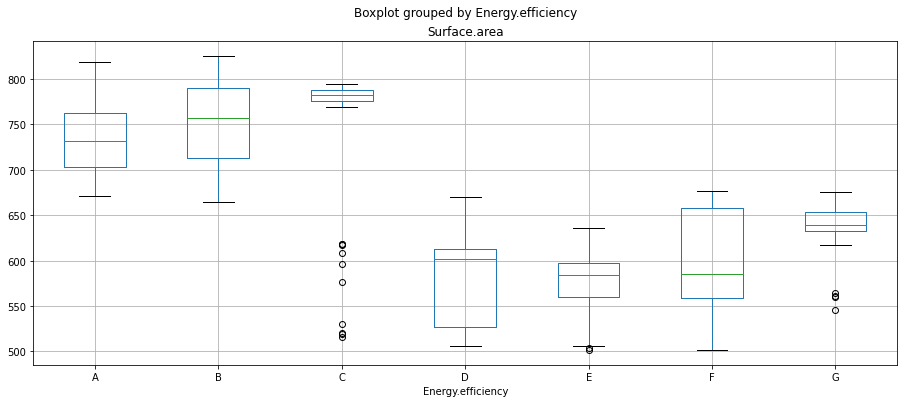

In [49]:
data.boxplot(column = 'Surface.area', by = 'Energy.efficiency', figsize=(15,6))
plt.show()

Les boxplot ne sont pas aligné, on peut dire que la surface va influencer l'Energie 

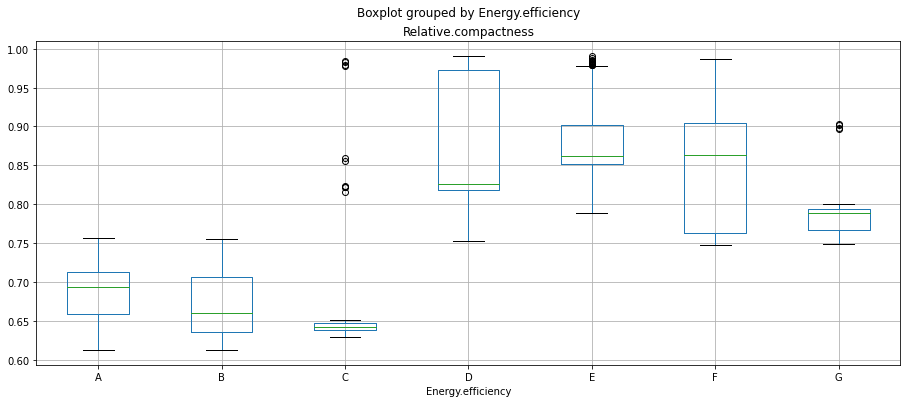

In [51]:
data.boxplot(column = 'Relative.compactness', by = 'Energy.efficiency', figsize=(15,6))
plt.show()

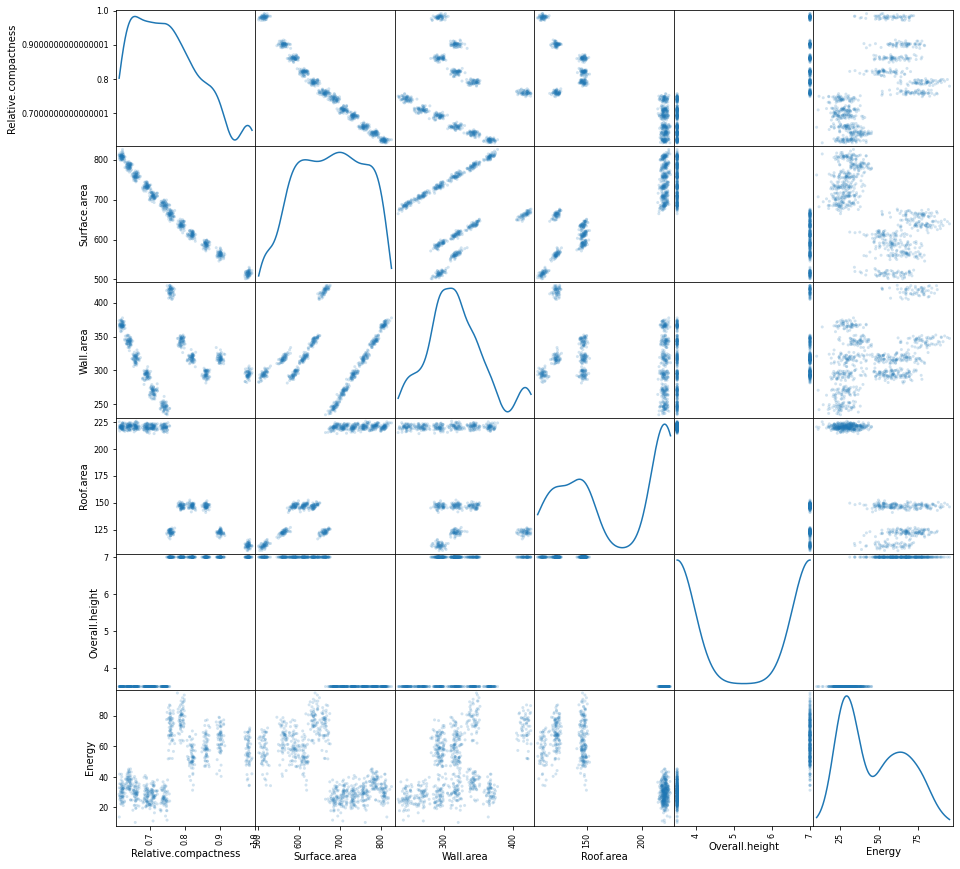

In [65]:
# scatter plot matrix des variables quantitatives
from pandas.plotting import scatter_matrix
data_quantitatives = data[["Relative.compactness","Surface.area","Wall.area","Roof.area","Overall.height","Energy"]]
scatter_matrix(data_quantitatives, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

On peut prédire l'énergie à partir d'une valeur de relative compactness ou surface area (les deux voites en bas à gauche). 

In [66]:
data_quantitatives.corr()

,Relative.compactness,Surface.area,Wall.area,Roof.area,Overall.height,Energy
Relative.compactness,1.000000,-0.988152,-0.201226,-0.866346,0.824763,0.614011
Surface.area,-0.988152,1.000000,0.198450,0.879256,-0.854655,-0.650053
Wall.area,-0.201226,0.198450,1.000000,-0.292388,0.283634,0.438536
Roof.area,-0.866346,0.879256,-0.292388,1.000000,-0.971743,-0.847396
Overall.height,0.824763,-0.854655,0.283634,-0.971743,1.000000,0.878189
Energy,0.614011,-0.650053,0.438536,-0.847396,0.878189,1.000000


In [59]:
import seaborn as sns

<AxesSubplot:>

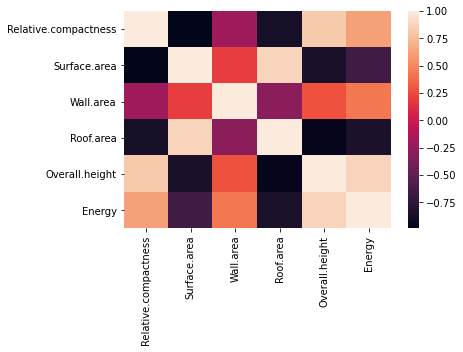

In [67]:
sns.heatmap(data_quantitatives.corr())